# IMPORT NECESSARY LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub 

# DATA COLLECTION

In [2]:
import os

folder_path_no = r"C:\Users\hamna\Downloads\lab_project\archive (1)\no"
folder_path_yes = r"C:\Users\hamna\Downloads\lab_project\archive (1)\yes"

folder_no = os.listdir(folder_path_no)
folder_yes = os.listdir(folder_path_yes)

print(len(folder_no))
print(len(folder_yes))


98
155


# DATA INSPECTION

In [3]:
folder_no[:4]

['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg']

# TARGET AND LABELS LABELLING

In [4]:
## We can consider 
   # No Tumor  >> 0
   # Yes Tumor >> 1 

no_label = [0]*len(folder_no)
yes_label = [1]*len(folder_yes)

labels = no_label + yes_label
print(len(labels))

253


In [5]:
print(labels[:5])
print(labels[-5:])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


## IMAGE DATA PREPROCESSING

In [6]:
# Convert image into numpy array
# Resize image ino 224 x 224 x 3
# Image Visualization
# Scale the image array

In [7]:
data = []

for img in folder_no:
    image = Image.open(r"C:\Users\hamna\Downloads\lab_project\archive (1)\no\{}".format(img))
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

for img in folder_yes:
    image = Image.open(r"C:\Users\hamna\Downloads\lab_project\archive (1)\yes\{}".format(img))
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

In [8]:
len(data)

253

In [9]:
data[0].shape

(224, 224, 3)

In [10]:
x = np.array(data)
y = np.array(labels)

In [11]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# EXPLORATOY DATA ANALYSIS 

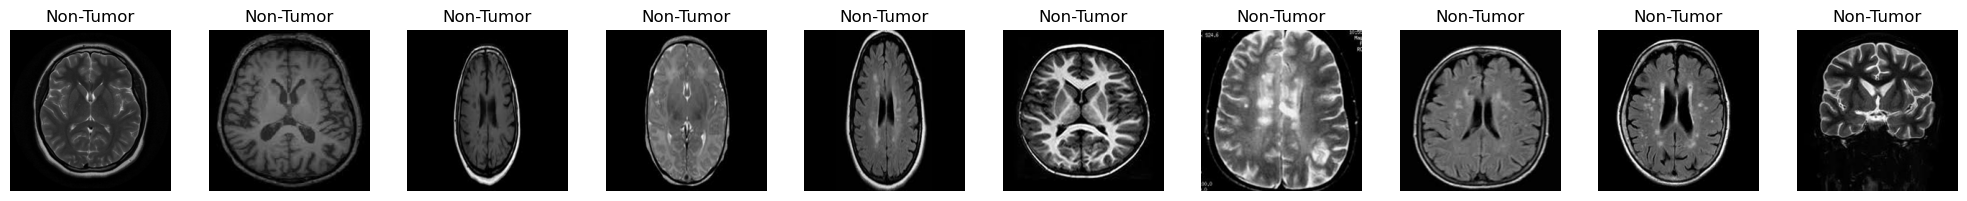

In [13]:
import matplotlib.pyplot as plt
import numpy as np
class_labels = ['Non-Tumor', 'Tumor']

import matplotlib.pyplot as plt

# Assuming data and labels are your image data and corresponding labels
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes.flat):
    ax.imshow(data[i])
    ax.set_title(class_labels[labels[i]])  # Use class_labels here
    ax.axis('off')
plt.tight_layout()
plt.show()

# SPLIT THE DATA 

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227, 224, 224, 3)
(26, 224, 224, 3)
(227,)
(26,)


In [15]:
x_train[0]

array([[[ 55,  55,  55],
        [100, 100, 100],
        [ 59,  59,  59],
        ...,
        [147, 147, 147],
        [159, 159, 159],
        [149, 149, 149]],

       [[136, 136, 136],
        [116, 116, 116],
        [  3,   3,   3],
        ...,
        [133, 133, 133],
        [102, 102, 102],
        [113, 113, 113]],

       [[ 11,  11,  11],
        [ 13,  13,  13],
        [  0,   0,   0],
        ...,
        [135, 135, 135],
        [120, 120, 120],
        [113, 113, 113]],

       ...,

       [[133, 133, 133],
        [  2,   2,   2],
        [  7,   7,   7],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[126, 126, 126],
        [  0,   0,   0],
        [  5,   5,   5],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 82,  82,  82],
        [  2,   2,   2],
        [ 51,  51,  51],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [16]:
y_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0])

# IMAGE DATA VISIUALIZATION

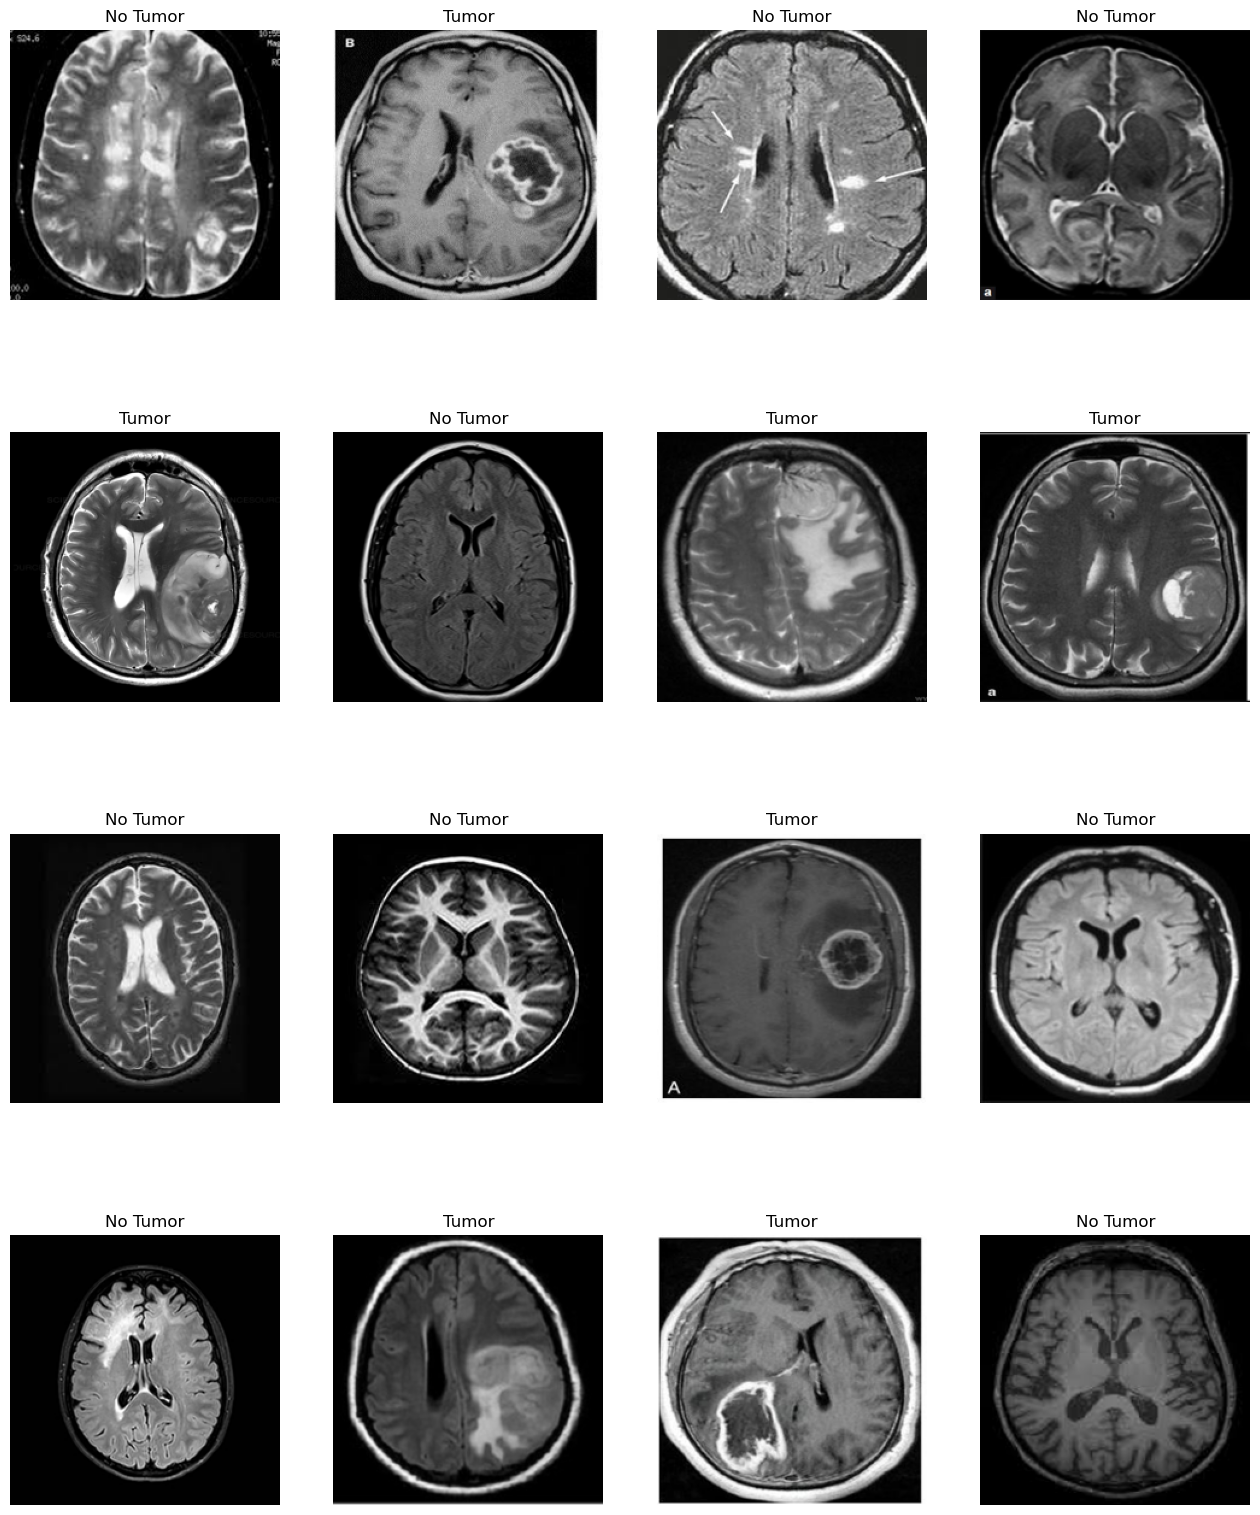

In [17]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"{class_labels[y_train[i]]}")
    plt.axis("off")

# SCALING AND NORMALIZATION OF DATA

In [18]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [19]:
x_train_scaled

array([[[[0.21568627, 0.21568627, 0.21568627],
         [0.39215686, 0.39215686, 0.39215686],
         [0.23137255, 0.23137255, 0.23137255],
         ...,
         [0.57647059, 0.57647059, 0.57647059],
         [0.62352941, 0.62352941, 0.62352941],
         [0.58431373, 0.58431373, 0.58431373]],

        [[0.53333333, 0.53333333, 0.53333333],
         [0.45490196, 0.45490196, 0.45490196],
         [0.01176471, 0.01176471, 0.01176471],
         ...,
         [0.52156863, 0.52156863, 0.52156863],
         [0.4       , 0.4       , 0.4       ],
         [0.44313725, 0.44313725, 0.44313725]],

        [[0.04313725, 0.04313725, 0.04313725],
         [0.05098039, 0.05098039, 0.05098039],
         [0.        , 0.        , 0.        ],
         ...,
         [0.52941176, 0.52941176, 0.52941176],
         [0.47058824, 0.47058824, 0.47058824],
         [0.44313725, 0.44313725, 0.44313725]],

        ...,

        [[0.52156863, 0.52156863, 0.52156863],
         [0.00784314, 0.00784314, 0.00784314]

In [20]:
x_test_scaled

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.00784314, 0.00784314, 0.00784314],
         [0.01176471, 0.01176471, 0.01176471]

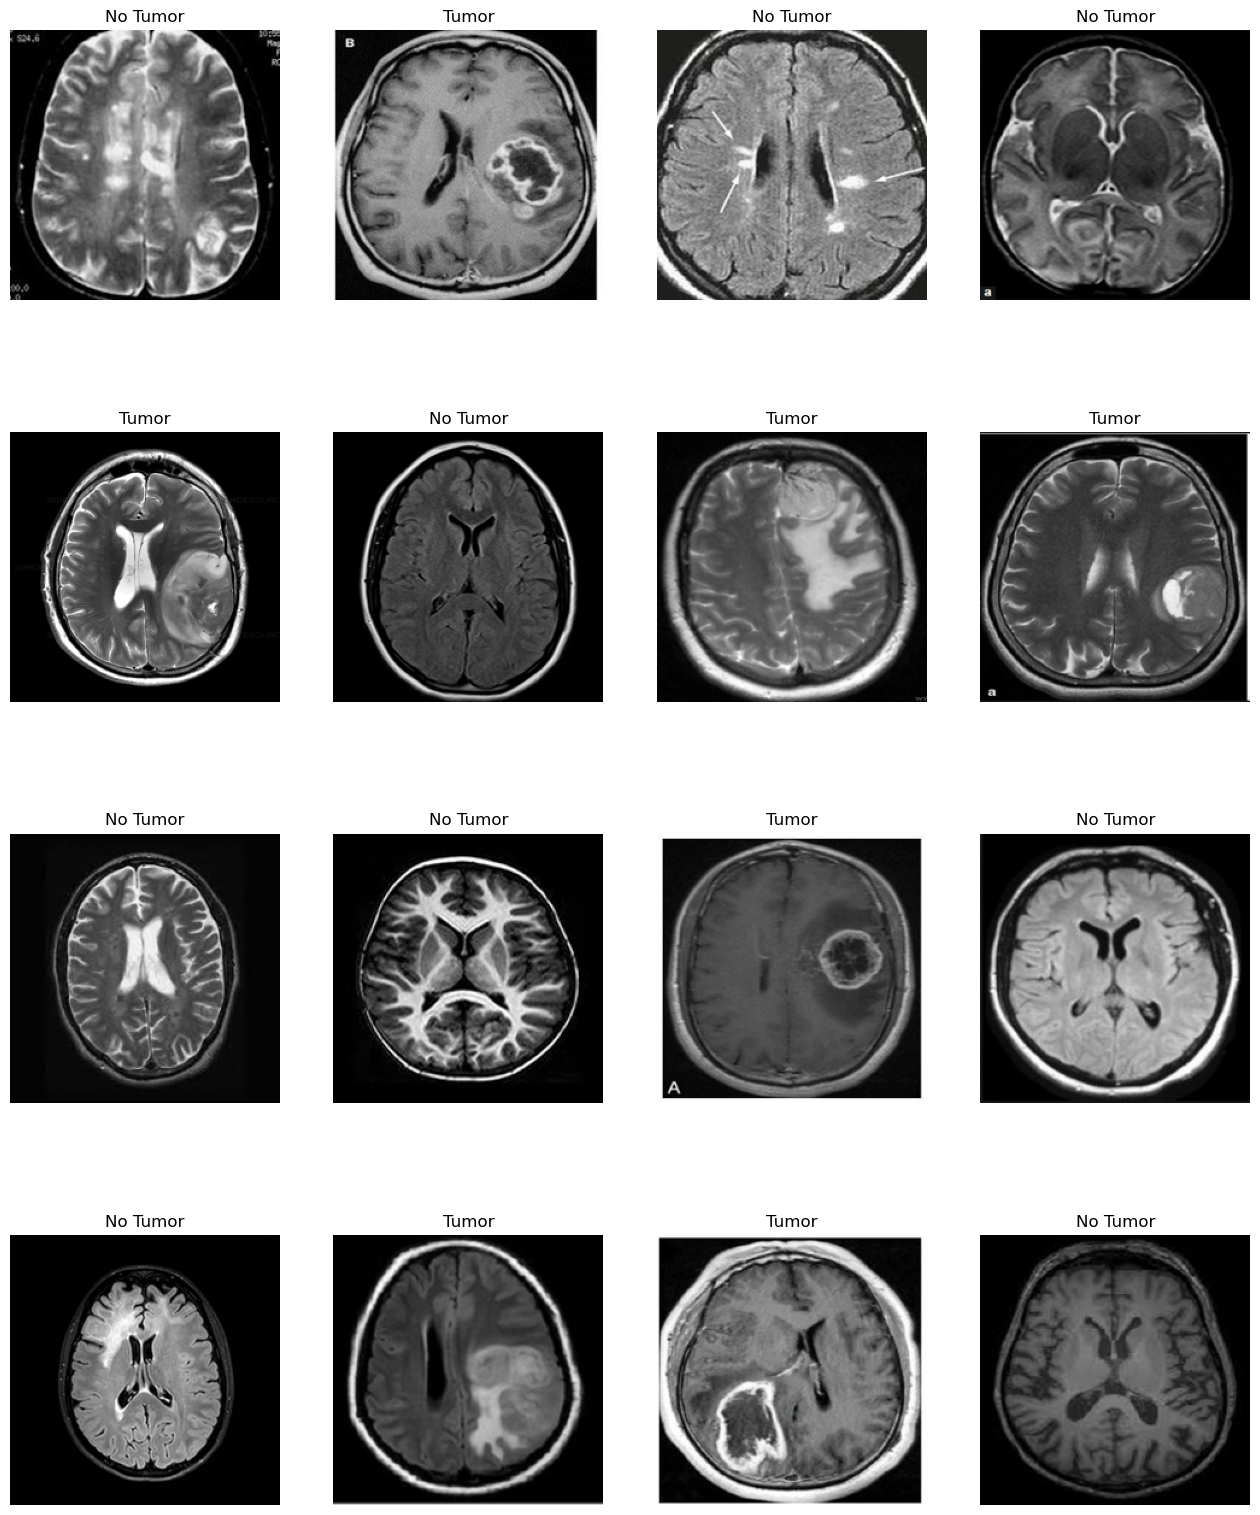

In [21]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train_scaled[i])
    plt.title(f"{class_labels[y_train[i]]}")
    plt.axis("off")

# LAB 7 TASKS

In [22]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load ResNet152 pre-trained model
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Customize the top layers for your classification task
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(x_train_scaled , y_train ,batch_size=32,
           epochs=15, validation_data=(x_test_scaled,y_test))

Epoch 1/15
8/8 [==============================] - 36s 4s/step - loss: 10.9365 - accuracy: 0.4934 - val_loss: 5.7910 - val_accuracy: 0.2308
Epoch 2/15
8/8 [==============================] - 27s 3s/step - loss: 2.8693 - accuracy: 0.5859 - val_loss: 0.3614 - val_accuracy: 0.8462
Epoch 3/15
8/8 [==============================] - 27s 3s/step - loss: 1.1412 - accuracy: 0.6123 - val_loss: 0.3043 - val_accuracy: 0.9231
Epoch 4/15
8/8 [==============================] - 28s 4s/step - loss: 0.7611 - accuracy: 0.6784 - val_loss: 0.3885 - val_accuracy: 0.7692
Epoch 5/15
8/8 [==============================] - 27s 3s/step - loss: 0.5669 - accuracy: 0.7401 - val_loss: 0.2170 - val_accuracy: 0.8462
Epoch 6/15
8/8 [==============================] - 27s 3s/step - loss: 0.6455 - accuracy: 0.6828 - val_loss: 0.4645 - val_accuracy: 0.7308
Epoch 7/15
8/8 [==============================] - 27s 3s/step - loss: 0.4382 - accuracy: 0.8018 - val_loss: 0.2664 - val_accuracy: 0.9231
Epoch 8/15
8/8 [=================

In [57]:
model.save("model/my_trained_model.h5")

In [37]:
loss, acc = model.evaluate(x_train_scaled,y_train)
print("Accuracy on Train Data:",acc)

8/8 [==============================] - 22s 3s/step - loss: 0.2832 - accuracy: 0.8855
Accuracy on Train Data: 0.8854625821113586


In [38]:
loss, acc = model.evaluate(x_test_scaled,y_test)
print("Accuracy on Test Data:",acc)

1/1 [==============================] - 2s 2s/step - loss: 0.2787 - accuracy: 0.8846
Accuracy on Test Data: 0.8846153616905212


In [39]:
y_pred = model.predict(x_test_scaled)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]

1/1 [==============================] - 2s 2s/step


### Confusion Matrix - Classification Report

In [40]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[ 4  1]
 [ 2 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.95      0.90      0.93        21

    accuracy                           0.88        26
   macro avg       0.81      0.85      0.83        26
weighted avg       0.90      0.88      0.89        26



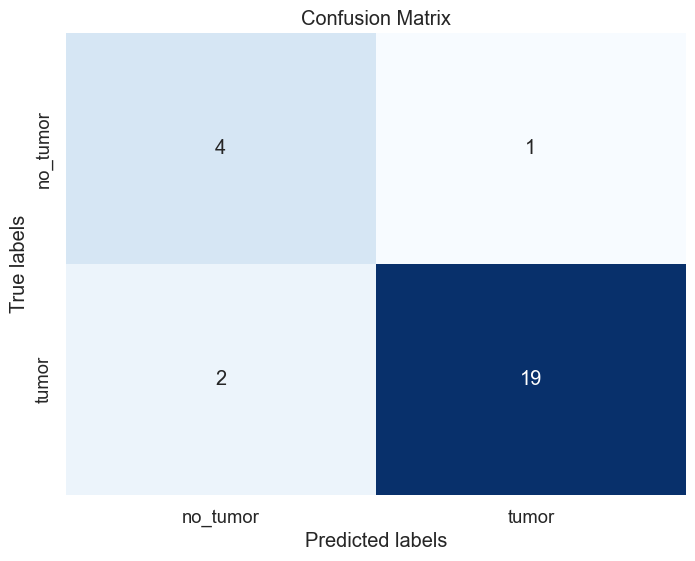

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


# Plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class names (if needed)
class_names = ['no_tumor', 'tumor']

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, class_names)


## ROC-Curve

In [42]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [43]:
y_prob = model.predict(x_test_scaled)

fpr, tpr, threshold = roc_curve(y_test, y_prob)

# Compute ROC curve and ROC area
roc_auc = auc(fpr, tpr)
print(f"ROC - Area :{roc_auc}")

1/1 [==============================] - 3s 3s/step
ROC - Area :0.9714285714285714


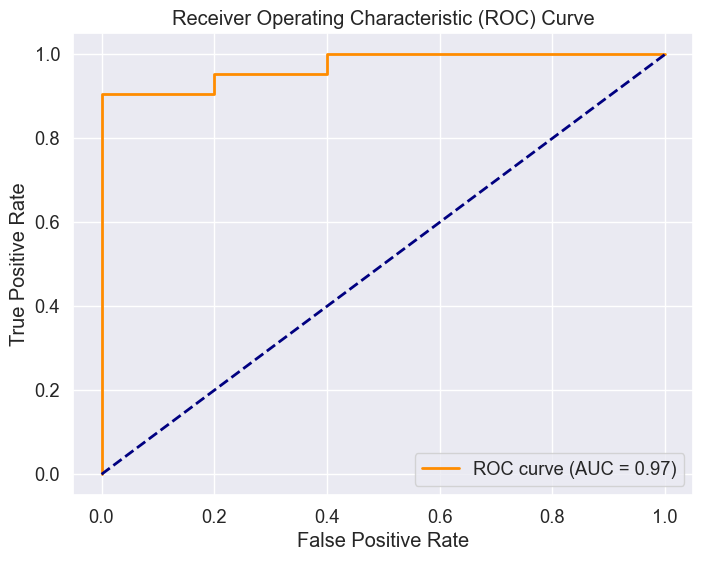

In [44]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## PR Curve

In [45]:
y_prob = model.predict(x_test_scaled)

precision, recall, threshold = precision_recall_curve(y_test, y_prob)

# Compute ROC curve and ROC area
pr_auc = auc(recall,precision)
print(f"ROC - Area :{pr_auc}")

1/1 [==============================] - 3s 3s/step
ROC - Area :0.993440841422208


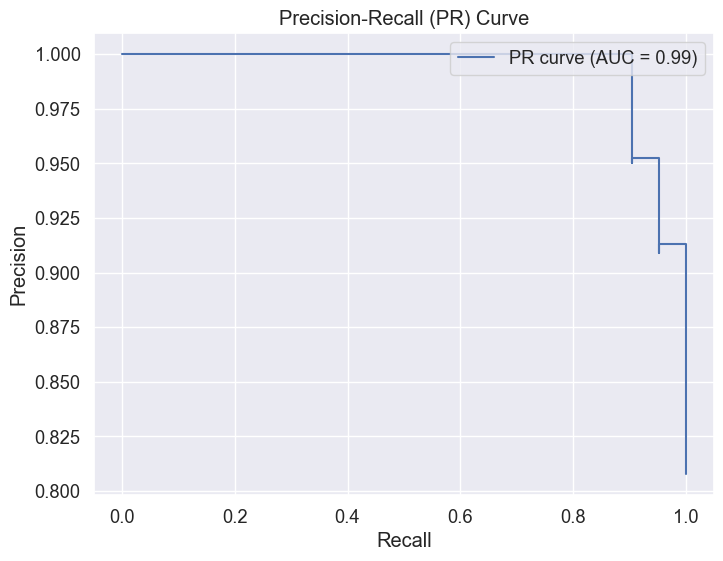

In [46]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='upper right')
plt.show()

## Actual & Predicted Image on VGG-19 Model

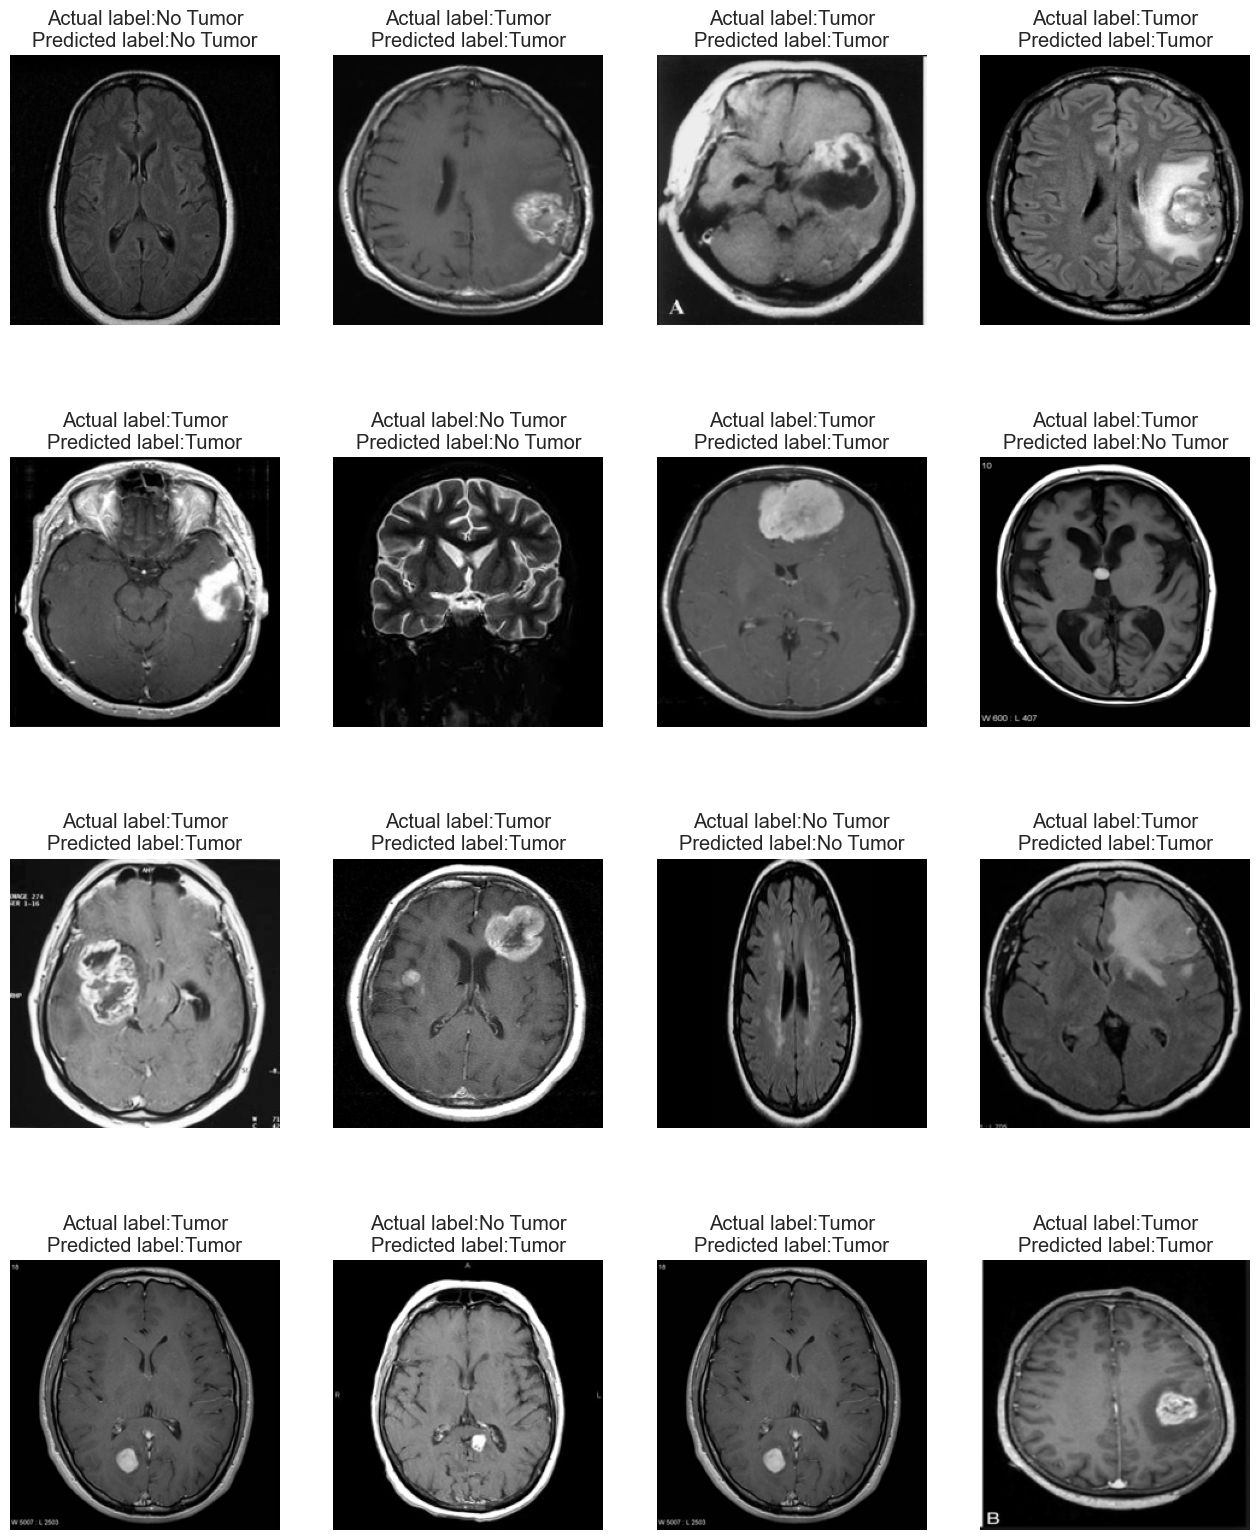

In [47]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual label:{class_labels[y_test[i]]}\nPredicted label:{class_labels[y_pred[i]]}")
    plt.axis("off")

In [58]:
import tensorflow as tf

# Load pre-trained model
model = tf.keras.models.load_model("model/my_trained_model.h5")

# Make predictions
predictions = model.predict(x_test)

# Save the model after making predictions
model.save("model/my_model_predictions.h5")


1/1 [==============================] - 6s 6s/step


In [60]:


import tensorflow as tf

# Load pre-trained model
model2 = tf.keras.models.load_model("model/my_trained_model.h5")

# Make predictions
predictions2 = model.predict(x_test_scaled)

# Save the model after making predictions
model2.save("model/my_model_predictions2.h5")

1/1 [==============================] - 3s 3s/step


In [68]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load the pre-trained model
model = tf.keras.models.load_model("model/my_model.h5")

# Define labels
class_labels = ["Tumor", "No Tumor"]

# Define prediction function
def predict_image(input_image):
    # Resize the input image to match the model's input shape
    input_image = input_image.resize((224, 224))
    
    # Preprocess the input image
    input_image = image.img_to_array(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    input_image = preprocess_input(input_image)

    # Make prediction
    prediction = model.predict(input_image)

    # Get the predicted label
    predicted_label = class_labels[y_pred[i]]

    return predicted_label


# Create Gradio interface
inputs = gr.inputs.Image(type="pil", label="Upload MRI image of a brain")
output = gr.outputs.Textbox(label="Prediction")

gr.Interface(fn=predict_image, inputs=inputs, outputs=output, title="Brain Tumor Detection").launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 182ms/step
